In [1]:
# Importing the RDSDatabaseConnector and DataTransform classes from the db_utils
from db_utils import RDSDatabaseConnector, DataTransform, DataFrameInfo, DataFrameTransform, Plotter

import pandas as pd
import yaml
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# Create an RDSDatabaseConnector instance using the loaded credentials
credentials = RDSDatabaseConnector.load_credentials('credentials.yaml')
connector = RDSDatabaseConnector(credentials)

In [3]:
# Initialize the SQLAlchemy engine and fetch data
connector.initialize_engine()
df = connector.fetch_data('loan_payments')

SQLAlchemy engine initialized successfully.


In [4]:
# Initialize the DataTransform class for the data transformations
transformer = DataTransform(df)

In [5]:
# Perform transformations on the dataframe
transformer.convert_columns_to_category(['term', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose'])
transformer.convert_columns_to_datetime(['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'])
transformer.convert_columns_to_int64(['funded_amount', 'funded_amount_inv', 'mths_since_last_delinq', 'mths_since_last_record', 'annual_inc'])

Converted term to category.
Converted grade to category.
Converted sub_grade to category.
Converted employment_length to category.
Converted home_ownership to category.
Converted verification_status to category.
Converted loan_status to category.
Converted payment_plan to category.
Converted purpose to category.
Converted issue_date to datetime.
Converted earliest_credit_line to datetime.
Converted last_payment_date to datetime.
Converted next_payment_date to datetime.
Converted last_credit_pull_date to datetime.
Converted funded_amount to int64.
Converted funded_amount_inv to int64.
Converted mths_since_last_delinq to int64.
Converted mths_since_last_record to int64.
Converted annual_inc to int64.


/Users/sym/Documents/AiCore/EDA/db_utils.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
/Users/sym/Documents/AiCore/EDA/db_utils.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
/Users/sym/Documents/AiCore/EDA/db_utils.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
/Users/sym/Documents/AiCore/EDA/db_utils.py:143: UserWarning: Could not infer format, so each 

In [6]:
# Save the transformed data to a CSV file 
transformer.df.to_csv('transformed_loan_payments.csv', index=False)

In [7]:
# Initialize the DataFrameInfo with your DataFrame
df_info = DataFrameInfo(df)

In [8]:
# Describe all columns
df_info.describe_all_columns()

Data types of each column:
id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                           int64
funded_amount_inv                       int64
term                                 category
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                              int64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_las

In [9]:
# Extract statistical values (median, std, mean)
df_info.extract_statistical_values()


Statistical Summary of Columns:
Median:
id                             7084590.00
member_id                      8709873.00
loan_amount                      12000.00
funded_amount                    10800.00
funded_amount_inv                11300.00
int_rate                            13.16
instalment                         347.15
annual_inc                       61000.00
dti                                 15.60
delinq_2yrs                          0.00
inq_last_6mths                       1.00
mths_since_last_delinq               0.00
mths_since_last_record               0.00
open_accounts                       10.00
total_accounts                      23.00
out_prncp                            0.00
out_prncp_inv                        0.00
total_payment                    10113.25
total_payment_inv                 9835.83
total_rec_prncp                   7644.92
total_rec_int                     1734.64
total_rec_late_fee                   0.00
recoveries                         

In [10]:
# Count distinct values in categorical columns
df_info.count_distinct_values()


Distinct Value Counts in Categorical Columns:
term: 2 distinct values
grade: 7 distinct values
sub_grade: 35 distinct values
employment_length: 11 distinct values
home_ownership: 5 distinct values
verification_status: 3 distinct values
loan_status: 9 distinct values
payment_plan: 2 distinct values
purpose: 14 distinct values


In [11]:
# Print the shape of the DataFrame
df_info.print_shape()


Shape of the DataFrame:
(54231, 43)


In [12]:
# Count and percentage of NULL values in each column
df_info.count_null_values()


Count of NULL Values in Each Column:
                             Null Count  Null Percentage
id                                    0         0.000000
member_id                             0         0.000000
loan_amount                           0         0.000000
funded_amount                         0         0.000000
funded_amount_inv                     0         0.000000
term                               4772         8.799395
int_rate                           5169         9.531449
instalment                            0         0.000000
grade                                 0         0.000000
sub_grade                             0         0.000000
employment_length                  2118         3.905515
home_ownership                        0         0.000000
annual_inc                            0         0.000000
verification_status                   0         0.000000
issue_date                            0         0.000000
loan_status                           0         0.

In [13]:
# Dropping mths_since_last_major_derog as it contains 86% Null values
transformer = DataFrameTransform(df)
transformer.drop_columns(['mths_since_last_major_derog'])


Successfully dropped columns: ['mths_since_last_major_derog']


In [14]:
# Dropping next_payment_date as it contains 60% Null values. The Null values are likely an indication of loans that have been fully paid or closed. 
transformer.drop_columns(['next_payment_date'])


Successfully dropped columns: ['next_payment_date']


In [15]:
# Check the value counts for the 'term' column
term_counts = df['term'].value_counts()
print(term_counts)


term
36 months    35845
60 months    13614
Name: count, dtype: int64


In [16]:
# Term has 8.8% missing values. I am going to impute these with the mode (36 months) since 36 months is by far the most dominant category and there are only 2 categories. 
mode_term = df['term'].mode()[0]
df['term'] = df['term'].fillna(mode_term)


In [17]:
# Checking the basic statistics of int_rate the decide what to do with the 9.5% of Null values 
print(df['int_rate'].describe()) 


count    49062.000000
mean        13.507328
std          4.392893
min          5.420000
25%         10.370000
50%         13.160000
75%         16.200000
max         26.060000
Name: int_rate, dtype: float64


In [18]:
# The mean and median are fairly similar in value, therefore will most likely produce similar results if either were imputed. I will go with median.
median_int_rate = df['int_rate'].median()
df['int_rate'] = df['int_rate'].fillna(median_int_rate)


In [19]:
# Check the value counts for the 'employment_length' column
employment_length_counts = df['employment_length'].value_counts()
print(employment_length_counts)



employment_length
10+ years    15907
2 years       5066
< 1 year      5034
3 years       4589
5 years       3836
1 year        3708
4 years       3482
6 years       3059
7 years       2964
8 years       2537
9 years       1931
Name: count, dtype: int64


In [20]:
# Since employment_length is categorical and has a clear dominant category I am going to impute the missing values with the mode ('10+ years'). 
mode_employment_length = df['employment_length'].mode()[0]
df['employment_length'] = df['employment_length'].fillna(mode_employment_length)


In [21]:
# last_payment_date, collections_12_mths_ex_med and last_credit_pull_date have a very small number of Null values in comparison to the size of the dataset, I will delete the rows with missing values. Removing a small number of rows should not significantly affect the overall dataset.
df.dropna(subset=['last_payment_date', 'collections_12_mths_ex_med', 'last_credit_pull_date'], inplace=True)

# Verify the shape of the dataset after dropping the rows
print(f"Dataset shape after dropping rows: {df.shape}")

Dataset shape after dropping rows: (54100, 41)


In [22]:
# Verifying no Null values
df_info.count_null_values()


Count of NULL Values in Each Column:
                            Null Count  Null Percentage
id                                   0              0.0
member_id                            0              0.0
loan_amount                          0              0.0
funded_amount                        0              0.0
funded_amount_inv                    0              0.0
term                                 0              0.0
int_rate                             0              0.0
instalment                           0              0.0
grade                                0              0.0
sub_grade                            0              0.0
employment_length                    0              0.0
home_ownership                       0              0.0
annual_inc                           0              0.0
verification_status                  0              0.0
issue_date                           0              0.0
loan_status                          0              0.0
payment_pl

In [23]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


In [24]:
# Import the original untransformed df to compare
original_df = pd.read_csv("loan_payments.csv")

<Figure size 1000x600 with 0 Axes>

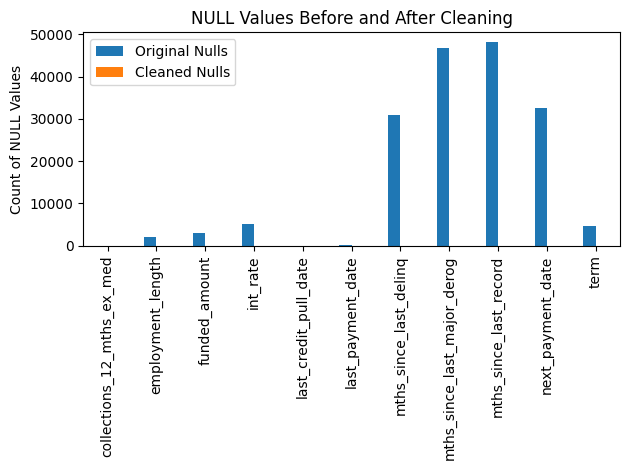

In [25]:
# Visualize the NULL value comparison
plotter = Plotter(df)
plotter.plot_null_values(original_df)

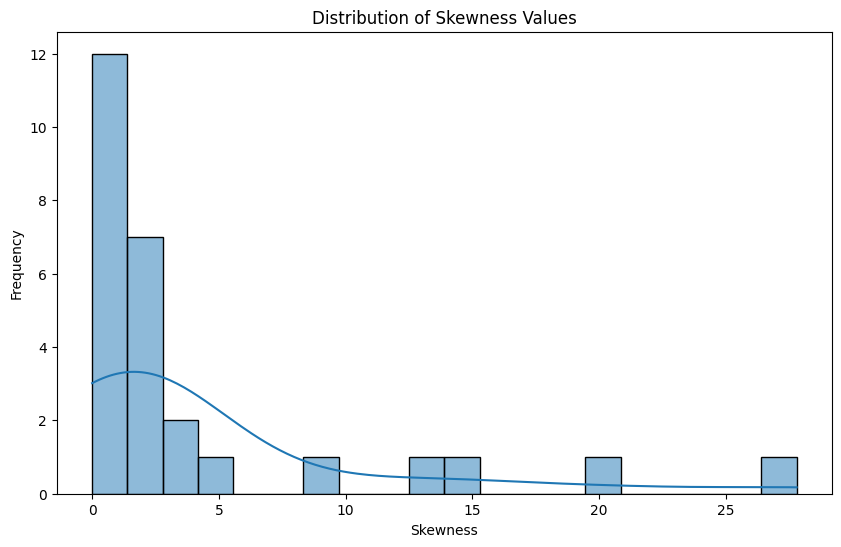

In [26]:
# Visualise the skewness values of the numeric columns 
plotter = Plotter(df)
plotter.plot_skewness_distribution()

In [27]:
# "The acceptable range for skewness or kurtosis below +1.5 and above −1.5."Tabachnick & Fidell (2013). I will therefore look to transform the columns outside that range.
plotter = Plotter(df)
skewed_columns = plotter.get_skewed_columns(threshold=1.5)
print("Columns with skewness > 1.5 and their skewness values:", skewed_columns)


Columns with skewness > 1.5 and their skewness values: {'id': 2.3694145865064615, 'member_id': 2.204548677177018, 'annual_inc': 8.73573640906559, 'delinq_2yrs': 5.318817917464191, 'inq_last_6mths': 3.243836167526465, 'mths_since_last_record': 3.0257746016896685, 'out_prncp': 2.352525970614482, 'out_prncp_inv': 2.3529464346145614, 'total_rec_int': 2.203625284669197, 'total_rec_late_fee': 13.258471830549329, 'recoveries': 14.382675406825468, 'collection_recovery_fee': 27.794716127396722, 'last_payment_amount': 2.496078600255455, 'collections_12_mths_ex_med': 20.29806369008403}


In [28]:
# Compare Log Transform, Box-Cox Transform and Yeo-Johnson Transform to determine which transformation results in the biggest reduction in skew and apply the transformation
df_transformer = DataFrameTransform(df)
transformed_df = df_transformer.transform_skewed_columns(skewed_columns)


Skewness comparison for id:
Original Skew: 2.3694145865064615
Log Transform Skew: -0.2588726754901549
Box-Cox Transform Skew: -0.06112192057444854
Yeo-Johnson Transform Skew: -0.06112171345982926
--------------------------------------------------
Skewness comparison for member_id:
Original Skew: 2.204548677177018
Log Transform Skew: -0.27945778155150114
Box-Cox Transform Skew: -0.0685314213386068
Yeo-Johnson Transform Skew: -0.0685312873794012
--------------------------------------------------
Skewness comparison for annual_inc:
Original Skew: 8.73573640906559
Log Transform Skew: 0.14181808451454783
Box-Cox Transform Skew: -0.012177485717944643
Yeo-Johnson Transform Skew: -0.01218053935753633
--------------------------------------------------
Skewness comparison for delinq_2yrs:
Original Skew: 5.318817917464191
Log Transform Skew: None
Box-Cox Transform Skew: None
Yeo-Johnson Transform Skew: 1.86966925435691
--------------------------------------------------
Skewness comparison for inq

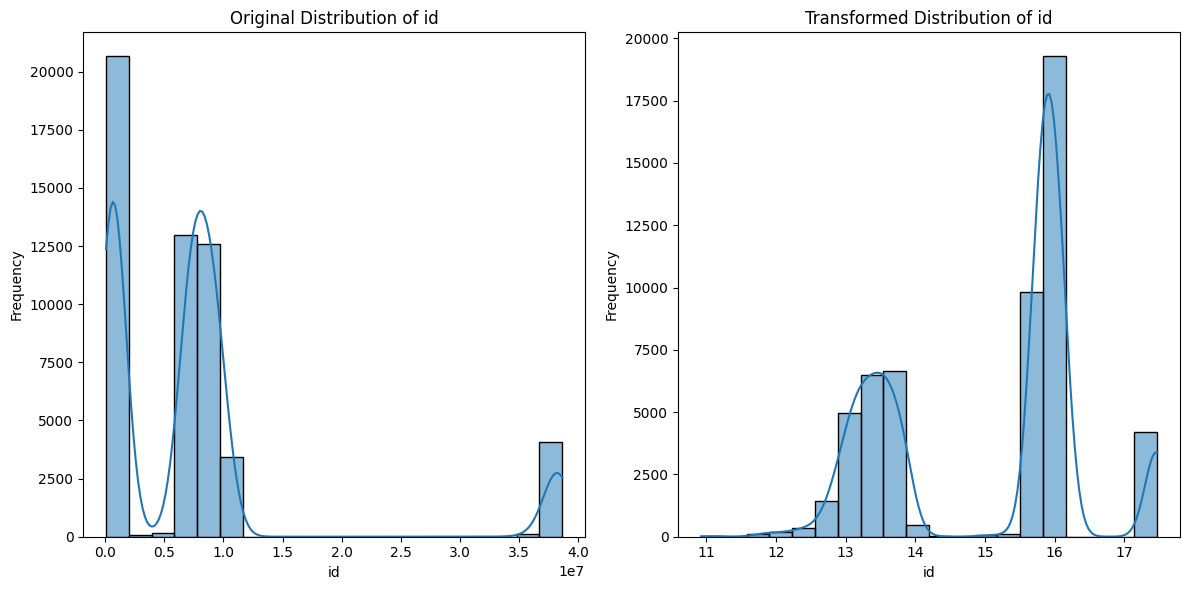

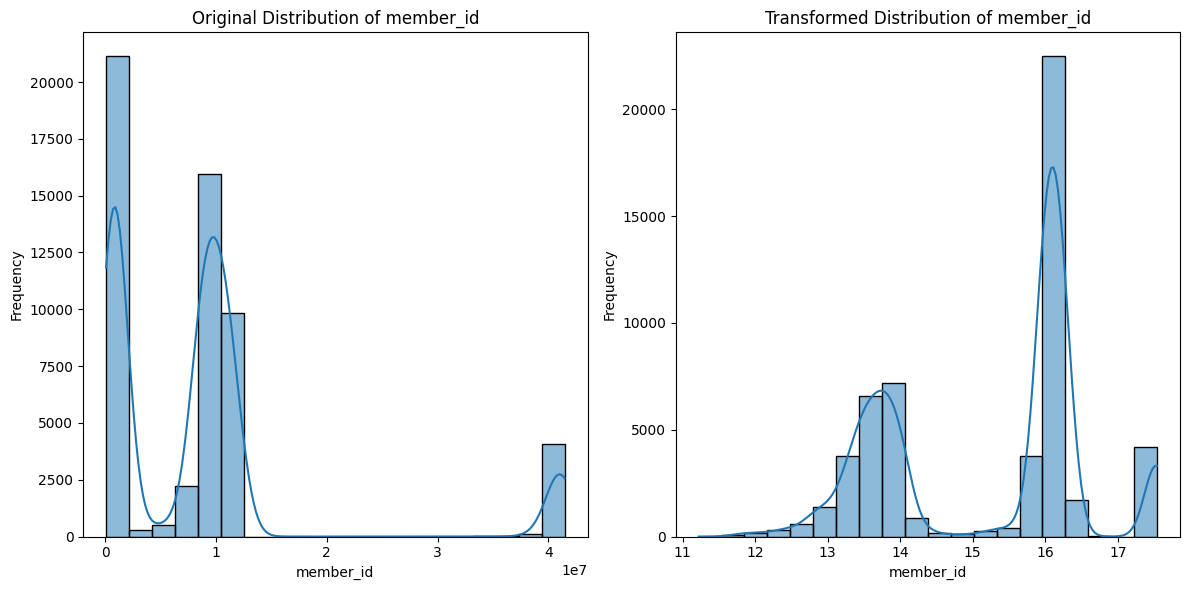

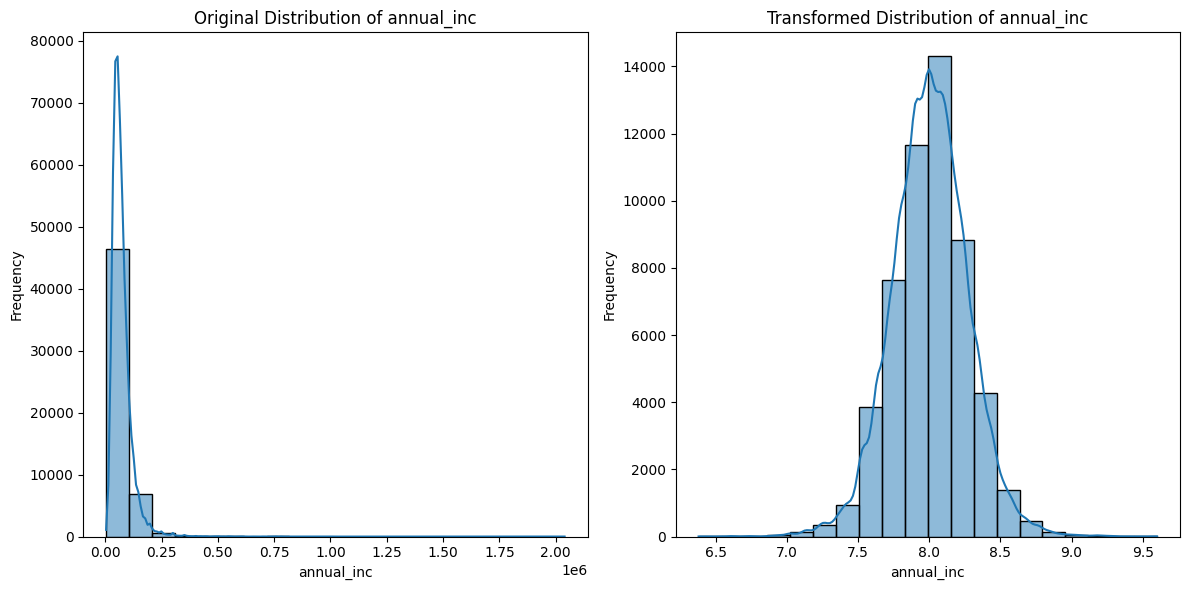

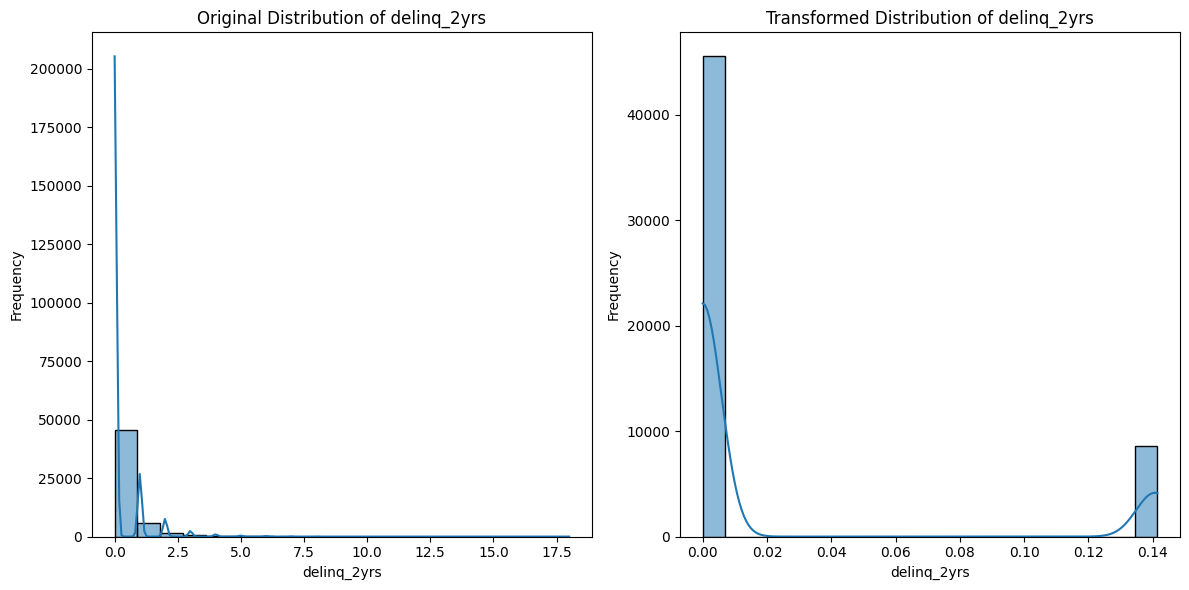

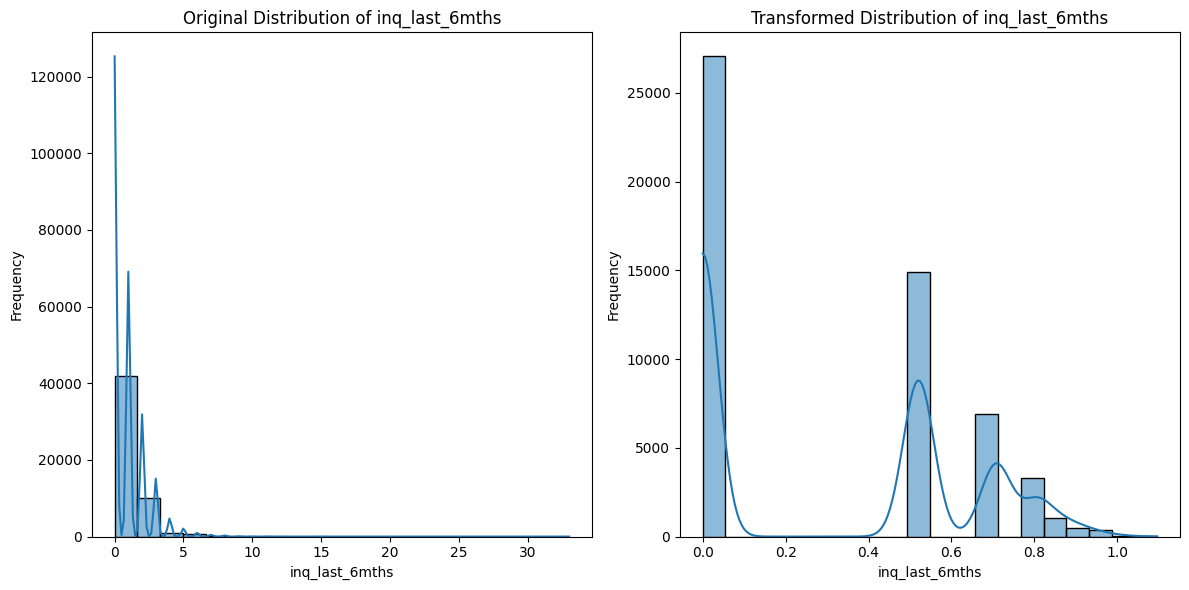

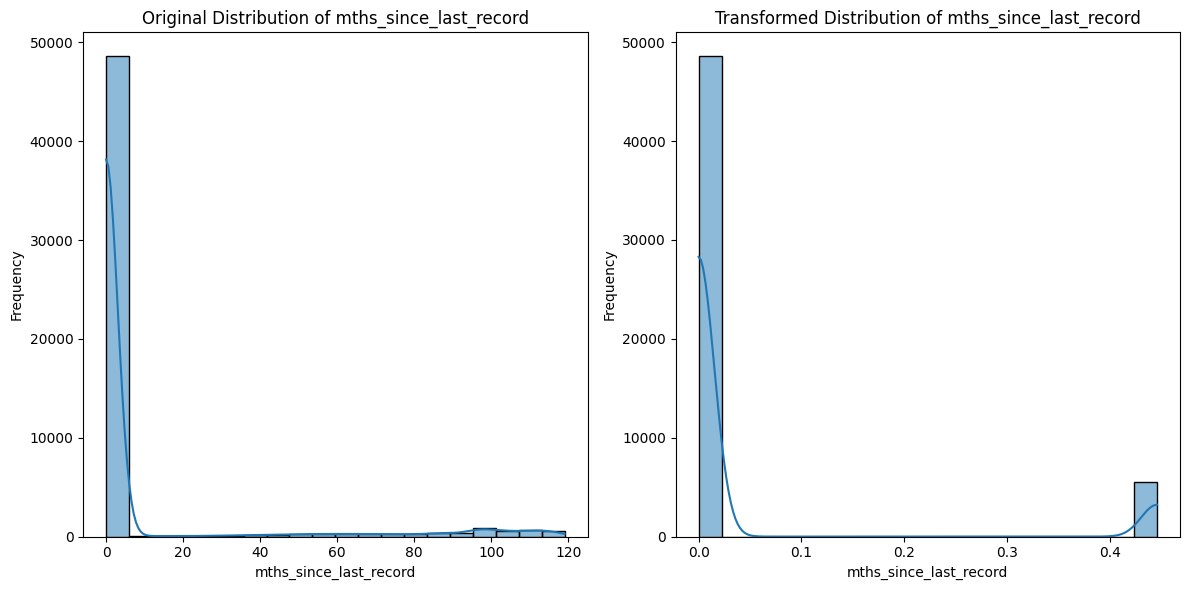

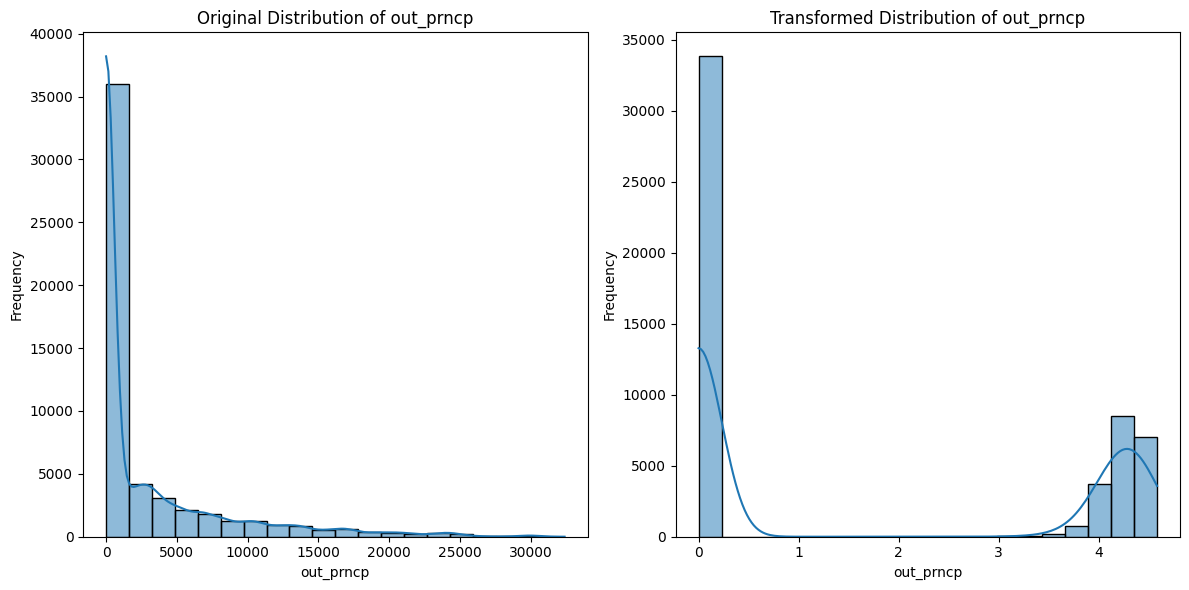

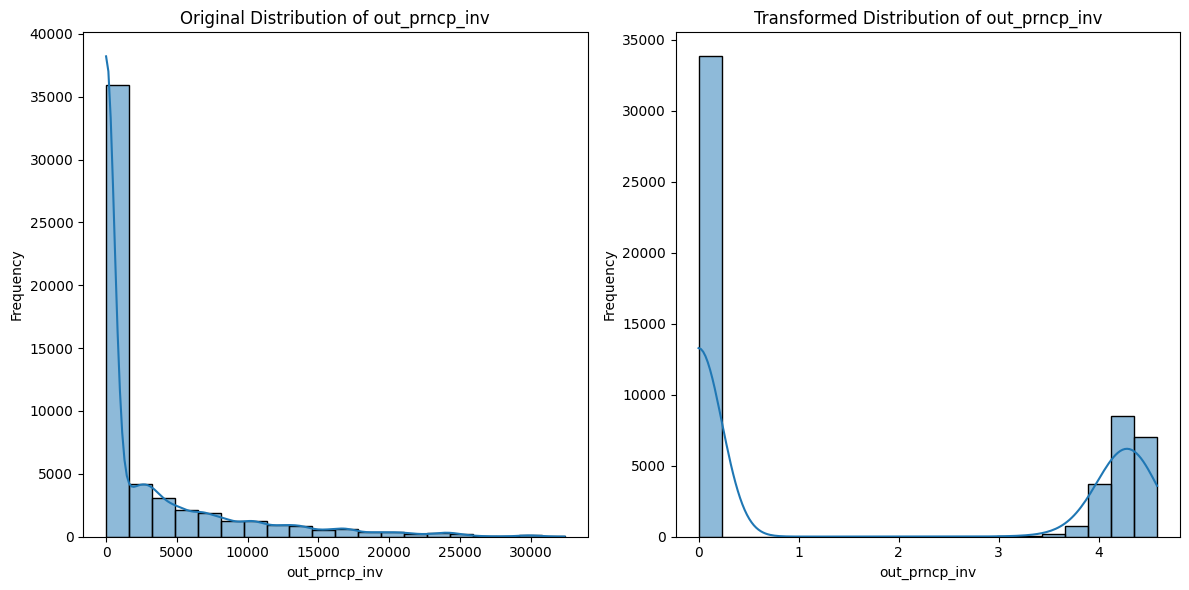

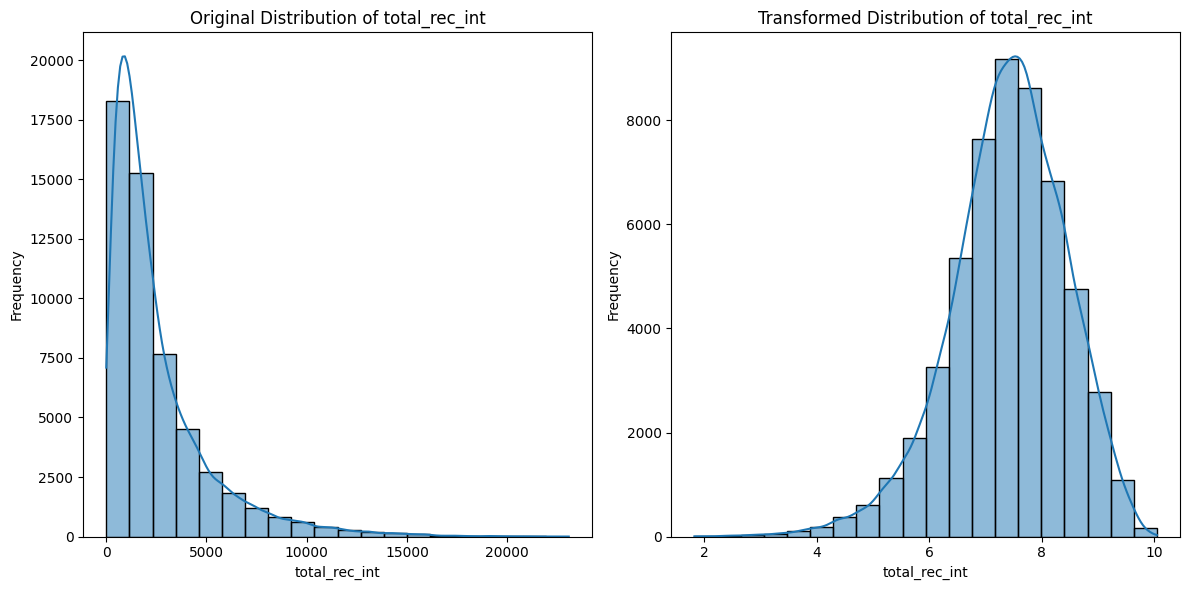

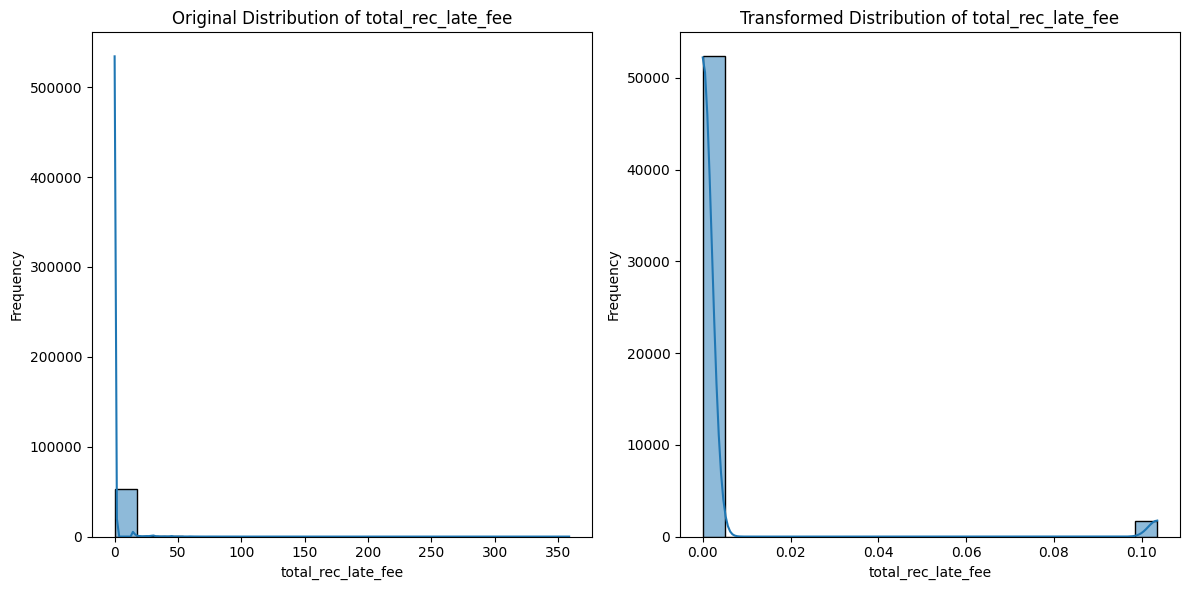

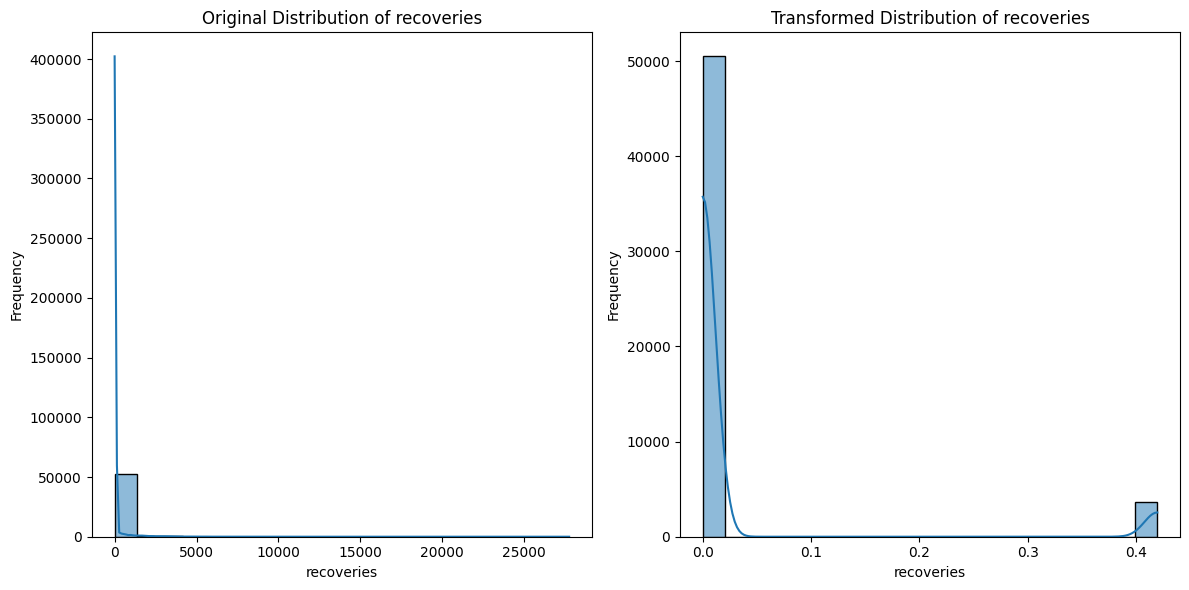

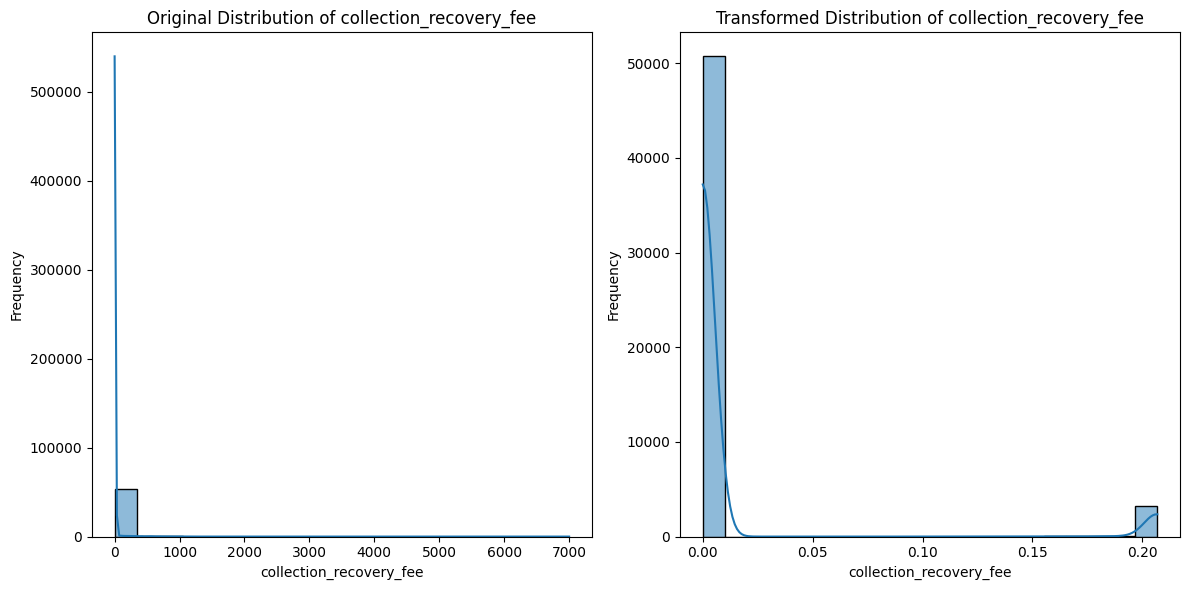

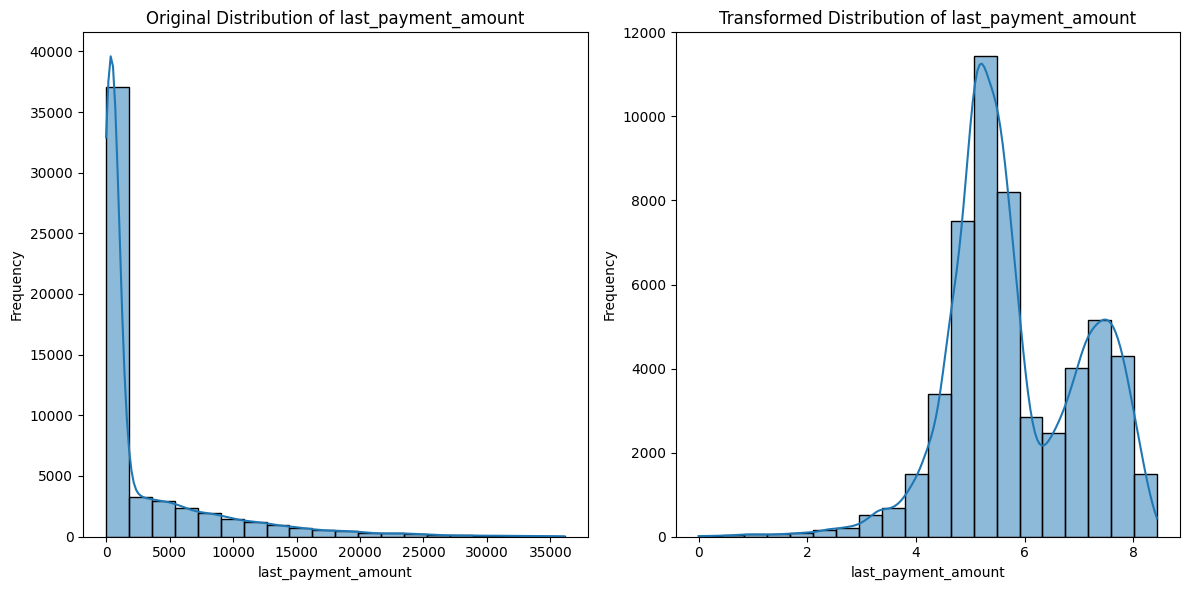

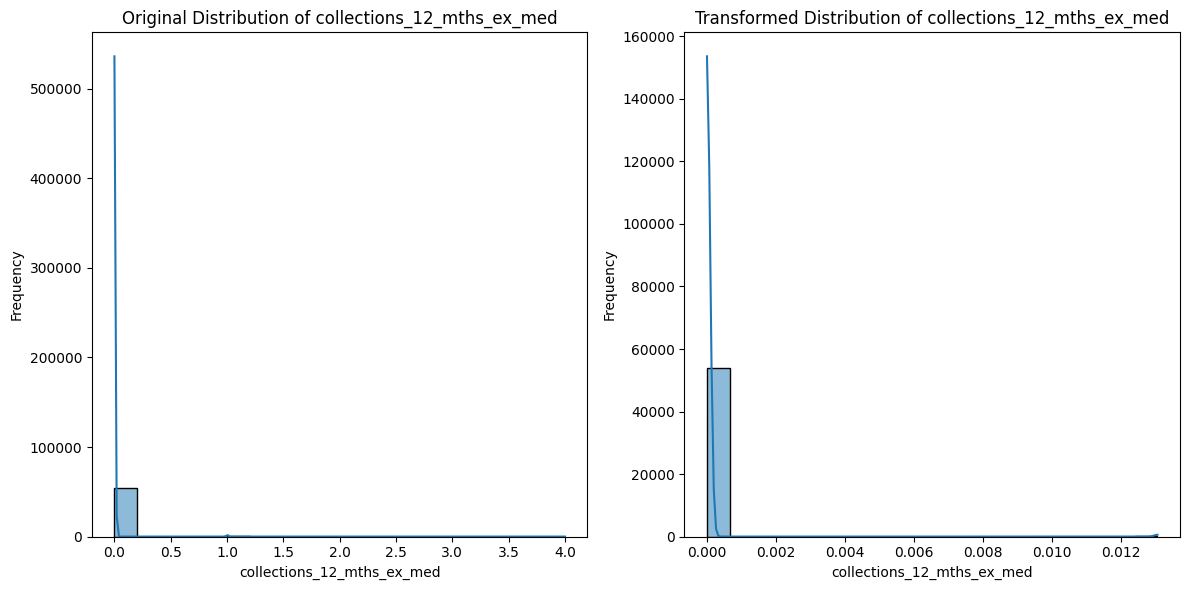

In [29]:
# Visualize the transformations
plotter = Plotter(transformed_df)
plotter.plot_transformed_skew(df, transformed_df, skewed_columns)

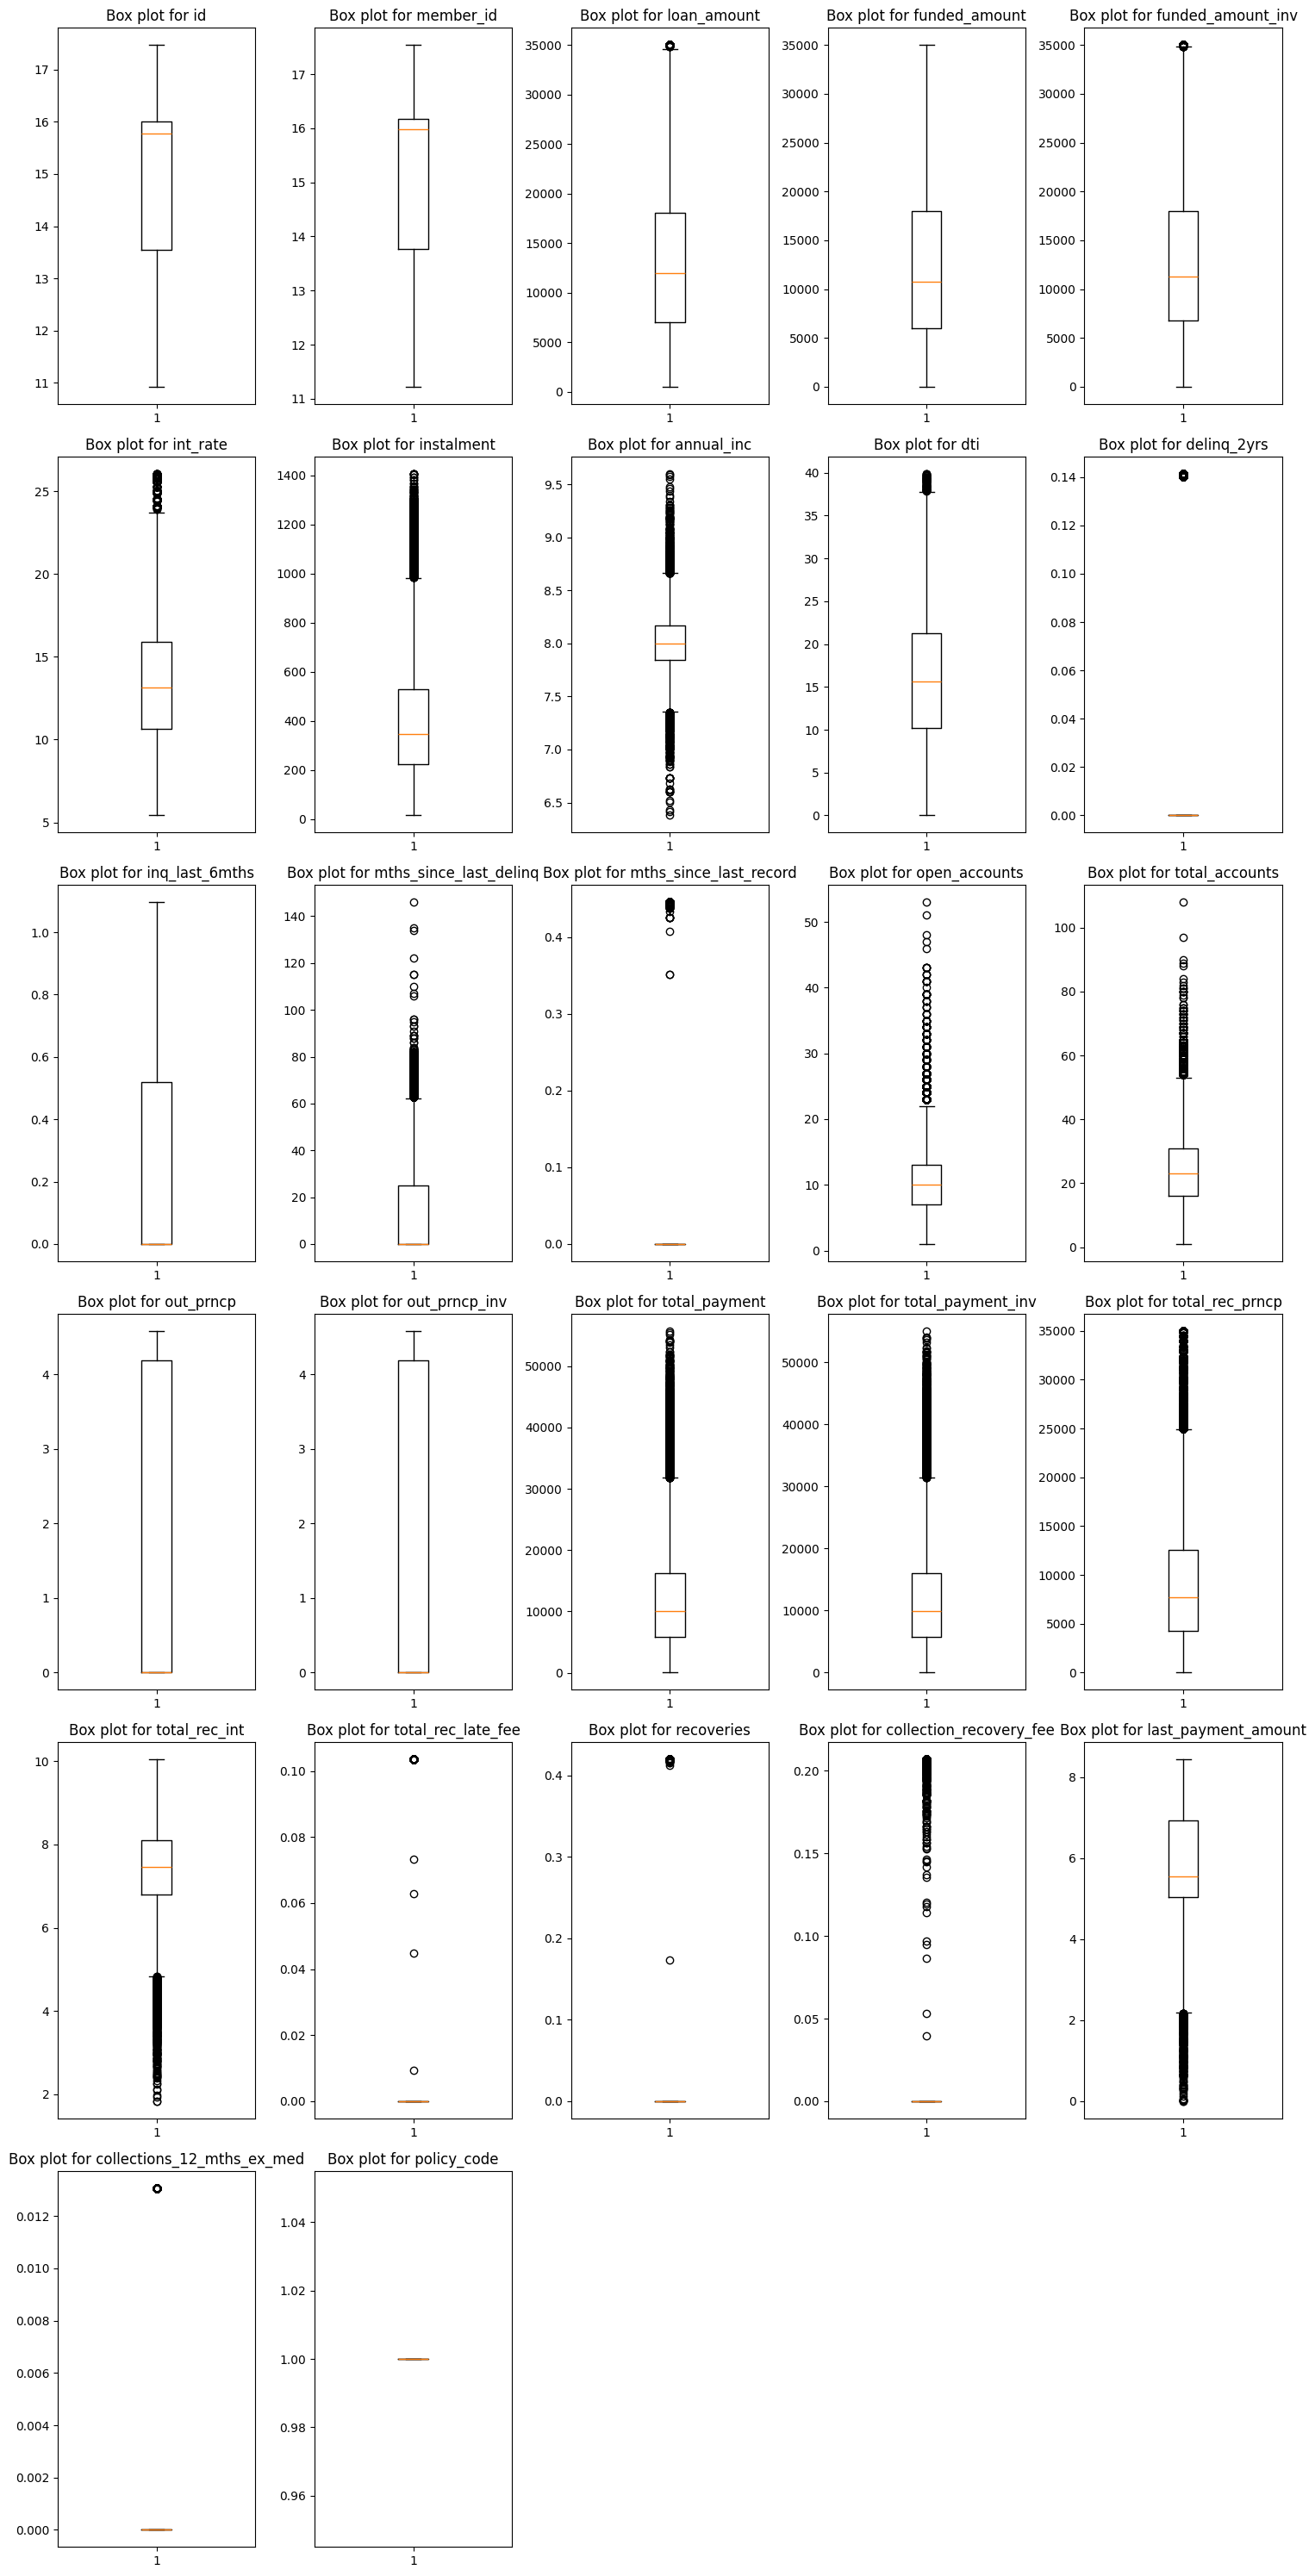

In [30]:
# Use box plots to visualise outliers
plotter = Plotter(transformed_df)
plotter.plot_boxplots()


In [31]:
# Use the IQR method to remove outliers
df_transformer = DataFrameTransform(transformed_df)
cleaned_df = df_transformer.remove_outliers()

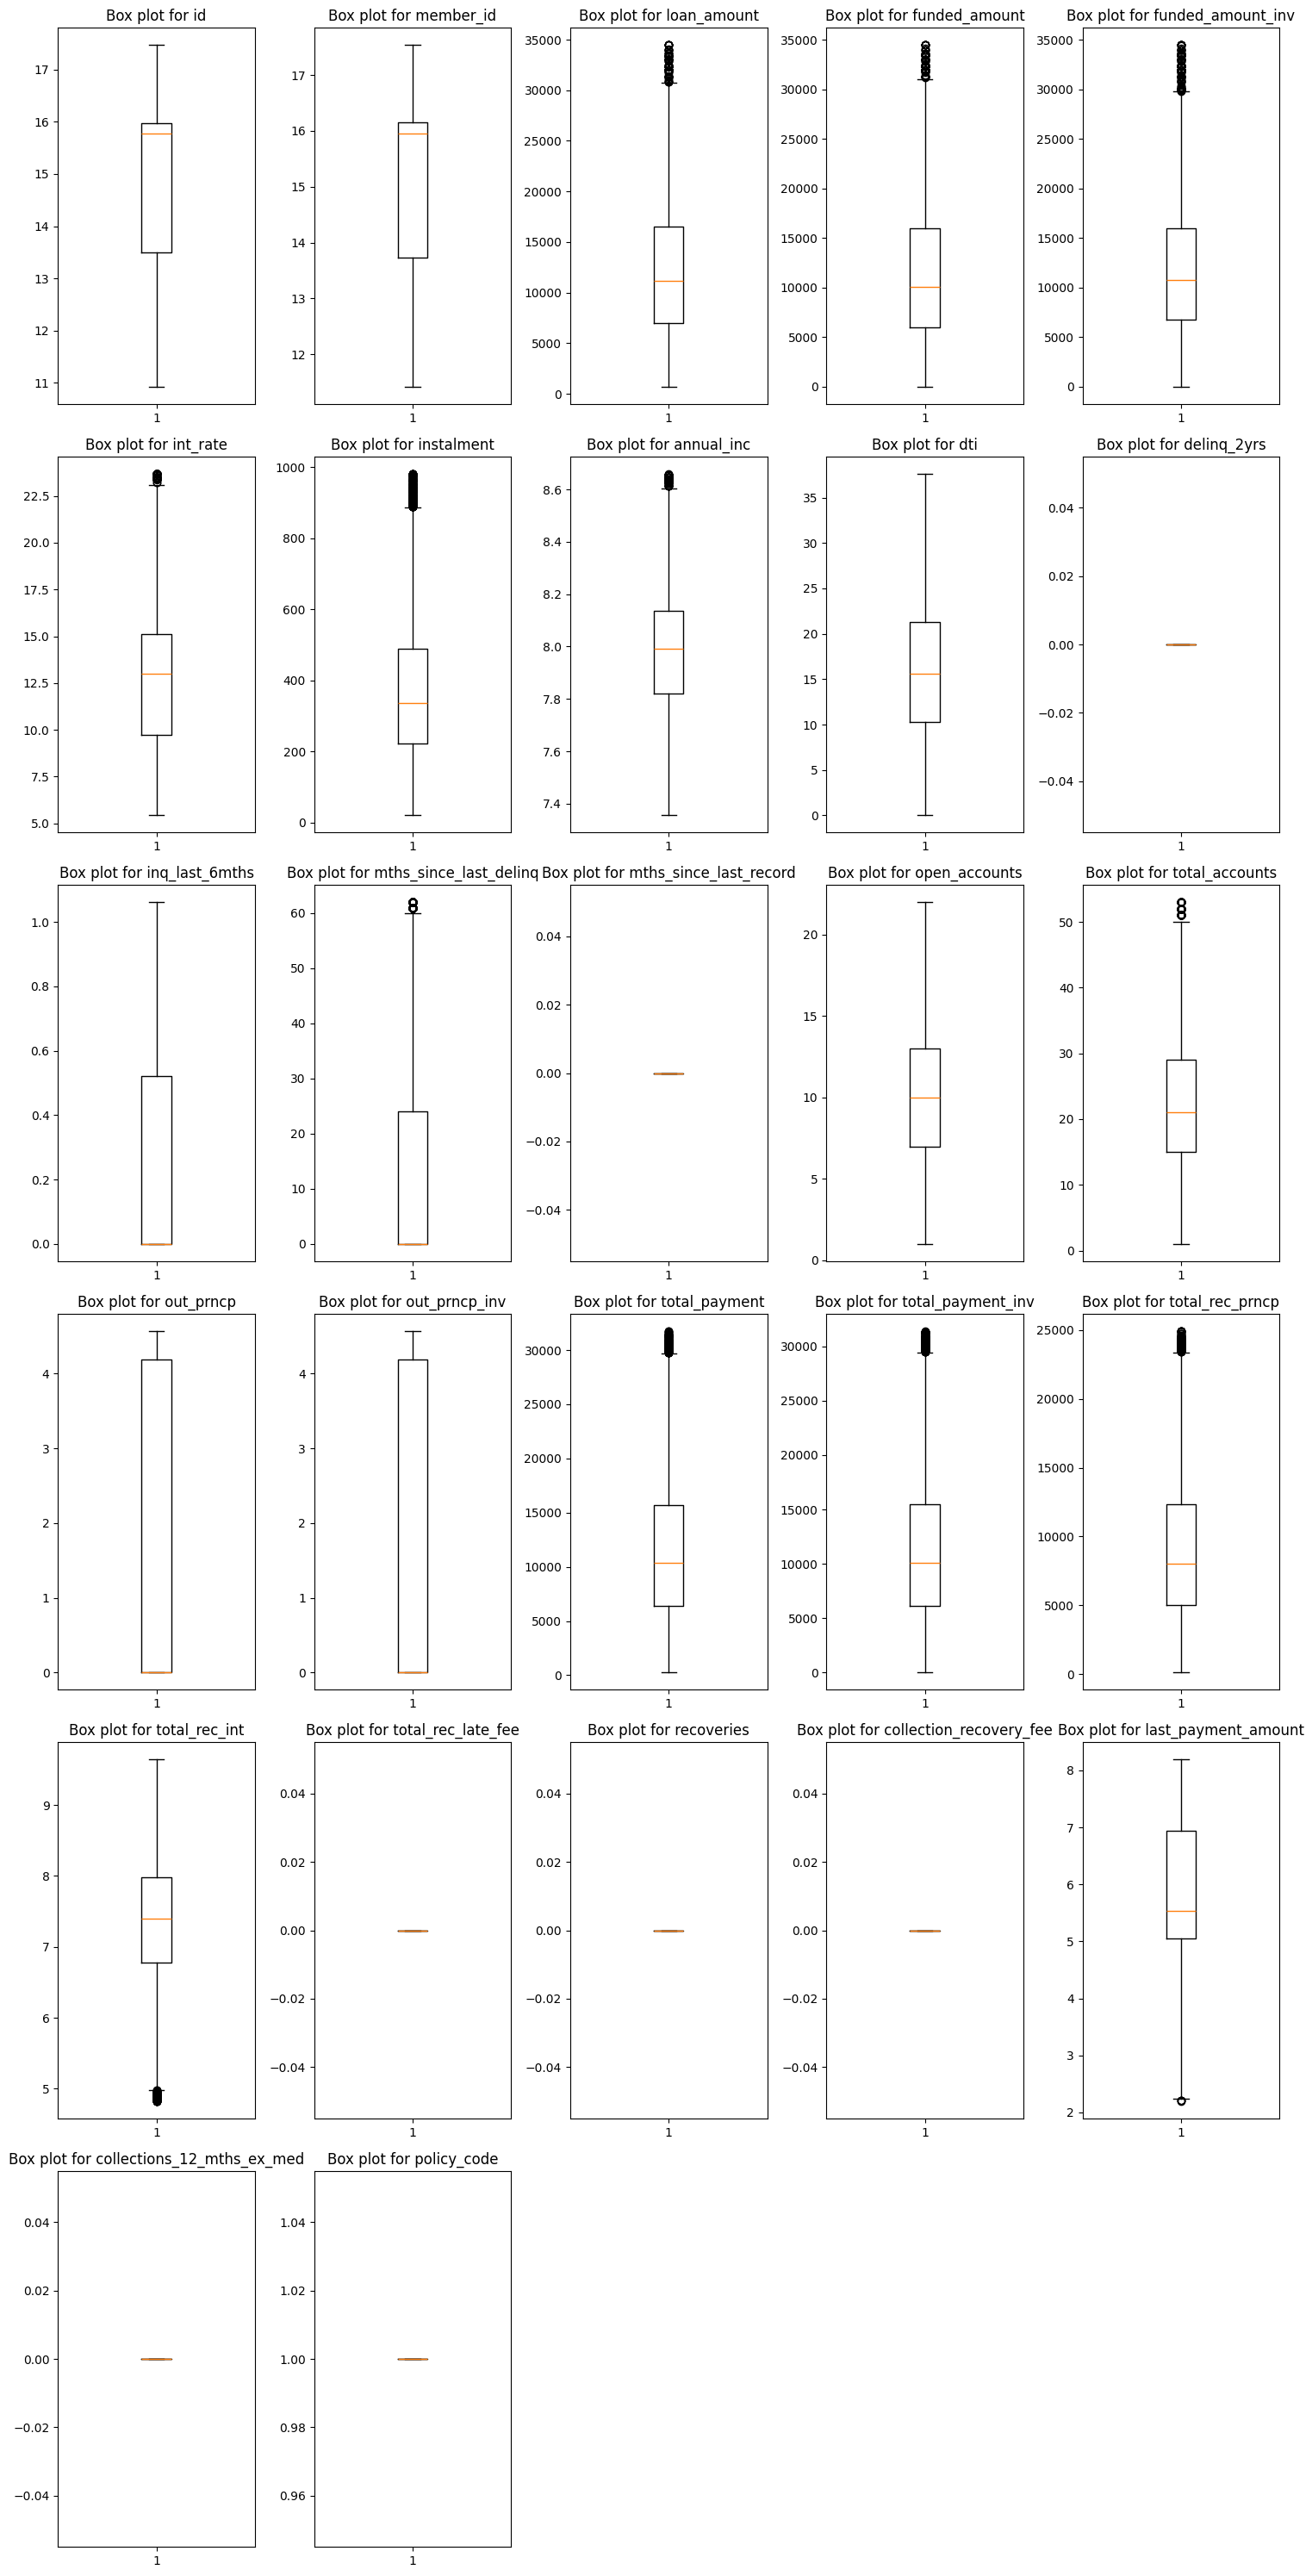

In [32]:
# Use box plots to visualise outliers after IQR 
plotter = Plotter(cleaned_df)
plotter.plot_boxplots()

In [33]:
# Calculate correlation matrix 
corr_matrix = cleaned_df.select_dtypes(include=['number']).corr()

<Axes: >

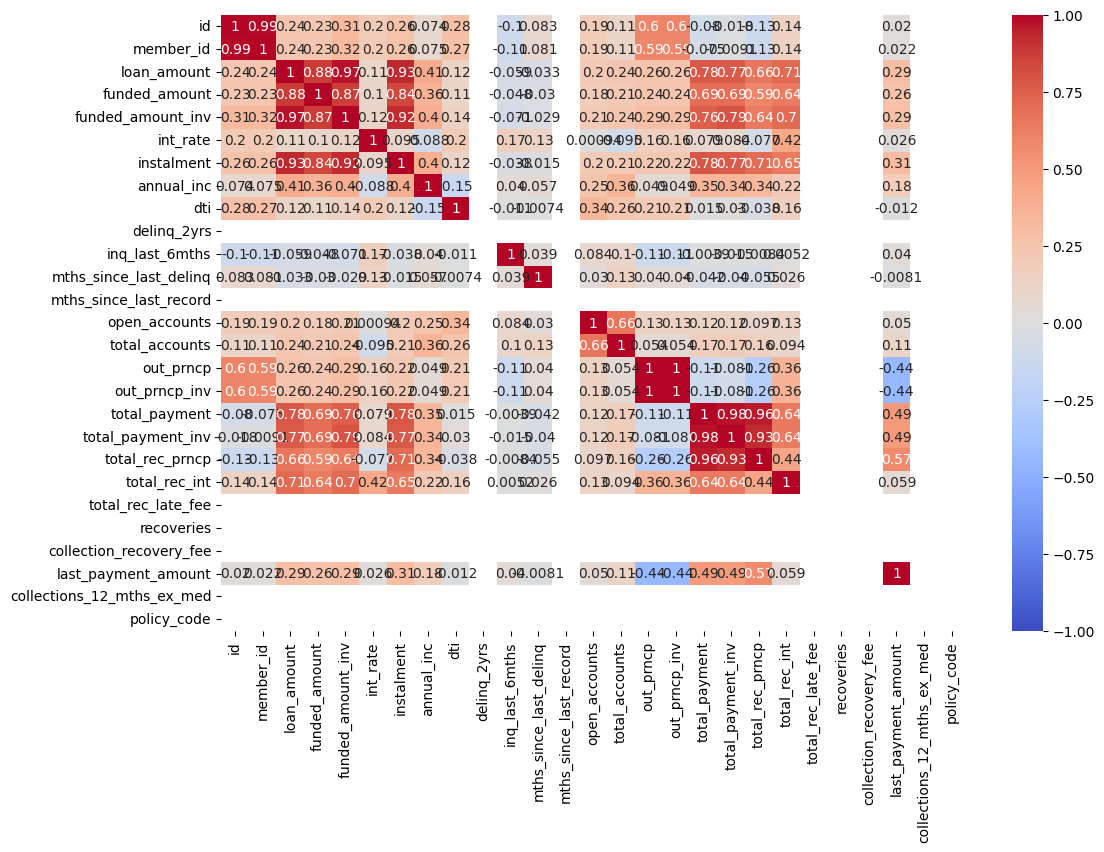

In [34]:
# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

In [35]:
# Using a threshold of 0.9 to identify highly correlated column pairs
threshold = 0.9
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlated_pairs = [(col, index) for col, index in zip(*np.where(upper_triangle > threshold))]
print("Highly correlated pairs:", correlated_pairs)


Highly correlated pairs: [(np.int64(0), np.int64(1)), (np.int64(2), np.int64(4)), (np.int64(2), np.int64(6)), (np.int64(4), np.int64(6)), (np.int64(15), np.int64(16)), (np.int64(17), np.int64(18)), (np.int64(17), np.int64(19)), (np.int64(18), np.int64(19))]


In [36]:
# Get numeric columns 
numeric_columns = cleaned_df.select_dtypes(include=['number']).columns

# Checking the pairs in order to choose columns to drop, as 1 will be dropped from each
correlated_columns = [
    (numeric_columns[int(col1)], numeric_columns[int(col2)]) 
    for col1, col2 in [(0, 1), (2, 4), (2, 6), (4, 6), (15, 16), (17, 18), (17, 19), (18, 19)]
]

print("Highly correlated column pairs:")
for col1, col2 in correlated_columns:
    print(f"{col1} <-> {col2}")


Highly correlated column pairs:
id <-> member_id
loan_amount <-> funded_amount_inv
loan_amount <-> instalment
funded_amount_inv <-> instalment
out_prncp <-> out_prncp_inv
total_payment <-> total_payment_inv
total_payment <-> total_rec_prncp
total_payment_inv <-> total_rec_prncp


In [37]:
# Dropping the columns
columns_to_drop = [
    'member_id',     
    'funded_amount_inv', 
    'instalment',     
    'out_prncp_inv',   
    'total_payment_inv', 
    'total_rec_prncp' 
]
cleaned_df = cleaned_df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")
print(f"Remaining columns: {list(cleaned_df.columns)}")

Dropped columns: ['member_id', 'funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp']
Remaining columns: ['id', 'loan_amount', 'funded_amount', 'term', 'int_rate', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_accounts', 'total_accounts', 'out_prncp', 'total_payment', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code', 'application_type']


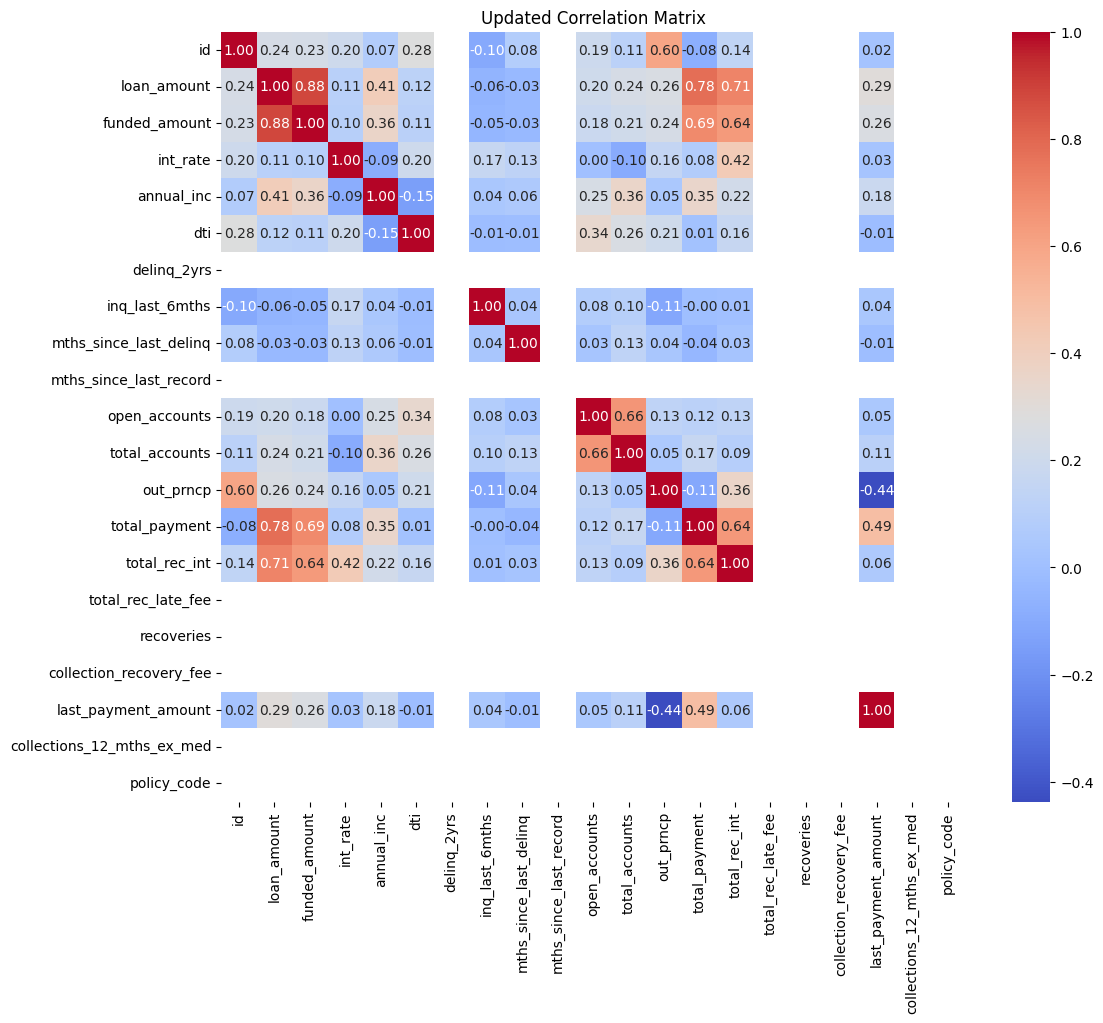

In [38]:
# Updated correlation matrix
updated_corr_matrix = cleaned_df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(updated_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Updated Correlation Matrix")
plt.show()


In [40]:
#Save the final DataFrame
cleaned_df.to_csv('final_cleaned_dataset.csv', index=False)

In [ ]:
#Final dataset size
cleaned_df.shape

(29381, 35)